In [49]:
import pandas as pd
import numpy as np
import seaborn as sns

In [21]:
df = pd.read_csv('/workspaces/Portfolio_Project/Dataset/word_develop_ind.csv')

In [22]:
df.head(3)

,Country Name,Series Name,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,GDP (current US$),12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,Afghanistan,GNI (current US$),12378340930.5187,15885775064.3022,17781511431.23,19961261595.0253,20209353657.8054,20559672324.9094,19249499438.7455,18350475875.2999,18961769787.4548,18294513957.5523,19080662010.7479,20105156769.1907,14352632363.74,14545219074.5763,..
2,Afghanistan,Imports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,7241822542.17594,5288529076.39681,7904463276.83616,..


In [23]:
# Melt the DataFrame to convert the year columns into rows 
df = pd.melt(df, id_vars=['Country Name', 'Series Name'], 
                    var_name='Year', value_name='Value')

# Pivot the DataFrame to convert the Series Name column into separate columns 
df = df.pivot(index=['Country Name', 'Year'], columns='Series Name', values='Value')

# Reset the index of the DataFrame 
df.reset_index(inplace=True)

In [24]:
df.head()

Series Name,Country Name,Year,Exports of goods and services (current US$),GDP (current US$),GNI (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total"
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157
3,Afghanistan,2012 [YR2012],..,19907329777.5872,19961261595.0253,..,6.3940710078319,6.44121280934117,7520865,30466479
4,Afghanistan,2013 [YR2013],..,20146416757.5987,20209353657.8054,..,5.06099068169274,7.38577178397855,7881567,31541209


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3255 entries, 0 to 3254
Data columns (total 10 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   Country Name                                                      3255 non-null   object
 1   Year                                                              3255 non-null   object
 2   Exports of goods and services (current US$)                       3255 non-null   object
 3   GDP (current US$)                                                 3255 non-null   object
 4   GNI (current US$)                                                 3255 non-null   object
 5   Imports of goods and services (current US$)                       3255 non-null   object
 6   Industry (including construction), value added (annual % growth)  3255 non-null   object
 7   Inflation, consumer prices (annual %)     

In [13]:
df.dtypes

Series Name
Country Name                                                        object
Year                                                                object
Exports of goods and services (current US$)                         object
GDP (current US$)                                                   object
GNI (current US$)                                                   object
Imports of goods and services (current US$)                         object
Industry (including construction), value added (annual % growth)    object
Inflation, consumer prices (annual %)                               object
Labor force, total                                                  object
Population, total                                                   object
dtype: object

In [27]:
column_to_rename = {'Country Name': 'Country',
                    'Exports of goods and services (current US$)': 'Exports_Goods_Services',
                    'GDP (current US$)': 'GDP',
                    'GNI (current US$)': 'GNI',
                    'Imports of goods and services (current US$)': 'Imports_Goods_Services',
                    'Labor force, total': 'Labor_Force',
                    'Population, total': 'Population'
                    }

In [29]:
df.rename(columns=column_to_rename, inplace=True)

In [30]:
df.head(2)

Series Name,Country,Year,Exports_Goods_Services,GDP,GNI,Imports_Goods_Services,"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)",Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672


In [31]:
columns_to_drop = ['Industry (including construction), value added (annual % growth)', 'Inflation, consumer prices (annual %)']

In [32]:
df.drop(columns= columns_to_drop, inplace=True)

In [33]:
df.head(2)

Series Name,Country,Year,Exports_Goods_Services,GDP,GNI,Imports_Goods_Services,Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6738587,28189672


In [35]:
df['Year'] = df['Year'].str.split(' ', expand=True)[0]
df.head(2)

Series Name,Country,Year,Exports_Goods_Services,GDP,GNI,Imports_Goods_Services,Labor_Force,Population
0,Afghanistan,2009,..,12416152732.0567,12378340930.5187,..,6504675,27385307
1,Afghanistan,2010,..,15856668555.8336,15885775064.3022,..,6738587,28189672


In [36]:
df.dtypes

Series Name
Country                   object
Year                      object
Exports_Goods_Services    object
GDP                       object
GNI                       object
Imports_Goods_Services    object
Labor_Force               object
Population                object
dtype: object

In [41]:
# df[['Year', 'Labor_Force', 'Population']] = df[['Year', 'Labor_Force', 'Population']].astype('int')
# df[['Exports_Goods_Services', 'GDP', 'GNI', 'Imports_Goods_Services']] = df[['Exports_Goods_Services', 'GDP', 'GNI', 'Imports_Goods_Services']].astype('float')# 

In [46]:
df['Year'] = df['Year'].astype('int')

In [47]:
df.dtypes

Series Name
Country                   object
Year                       int64
Exports_Goods_Services    object
GDP                       object
GNI                       object
Imports_Goods_Services    object
Labor_Force               object
Population                object
dtype: object

In [59]:
df.isnull().sum()

Series Name
Country                   0
Year                      0
Exports_Goods_Services    0
GDP                       0
GNI                       0
Imports_Goods_Services    0
Labor_Force               0
Population                0
dtype: int64

In [60]:
df[df.isnull().any(axis=1)]

Series Name,Country,Year,Exports_Goods_Services,GDP,GNI,Imports_Goods_Services,Labor_Force,Population


In [53]:
df.describe(include='all')

Series Name,Country,Year,Exports_Goods_Services,GDP,GNI,Imports_Goods_Services,Labor_Force,Population
count,3255,3255.000000,3255,3255,3255,3255,3255,3255
unique,217,NaN,2693,3123,2985,2696,2802,3253
top,Afghanistan,NaN,..,..,..,..,..,10525347
freq,15,NaN,560,133,271,560,453,2
mean,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.321158,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Year', ylabel='GDP'>

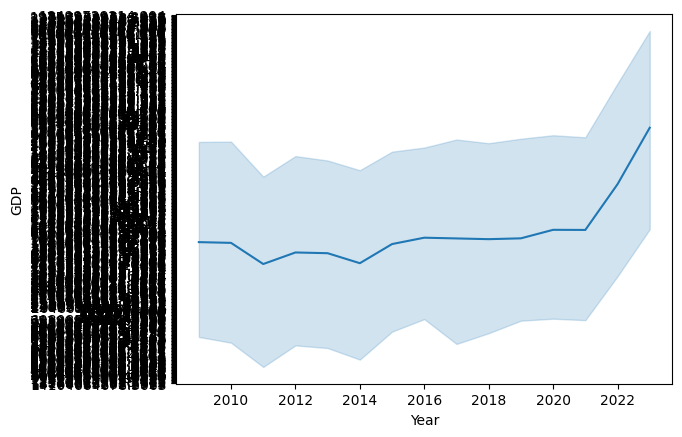

In [52]:
sns.lineplot(data=df, x='Year', y='GDP')